In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from PIL import Image

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

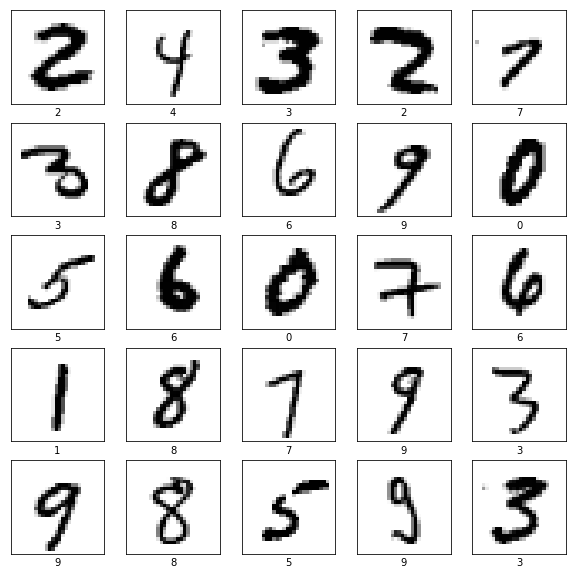

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i + 25], cmap='binary')
    plt.xlabel(y_train[i + 25])

# The Model 

In [8]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compile 

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train

In [10]:
model.fit(x_train, y_train, epochs=2)

Epoch 1/2
60000/60000 [==============================] - 15s 252us/step - loss: 0.2025 - acc: 0.9399
Epoch 2/2
60000/60000 [==============================] - 14s 233us/step - loss: 0.0805 - acc: 0.9756


# Test

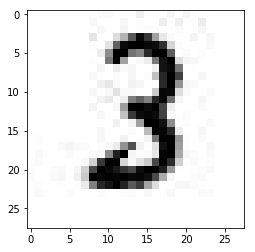

In [12]:
digit = Image.open("test_images/img_5.jpg").resize((28,28))

# convert to greyscale
digit = np.array(digit.convert("L"))
plt.imshow(digit, cmap="binary")


# Make Predictions

In [13]:
# Predict the digit in the student number
predict_array = model.predict(np.reshape(digit, (1,digit.shape[0], digit.shape[1])),
                    verbose=1)
predict_array
print("Digit recognized = ", np.argmax(predict_array))

1/1 [==============================] - 0s 66ms/step
Digit recognized =  3
